**Data Transformation Notebook**

<div style="font-family: system-ui; padding: 20px 30px 20px 20px; background-color: #FFFFFF; border-left: 8px solid #ED9255; border-radius: 8px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);max-width:600px;color:#212121;">

- 👤 Name: Lethokuhle Sikosana
- 🎯 Purpose: Conduct Statistical Analysis on SAPS Crime Data from 2008 - 2013 

<span style="display:block;line-height:1.15em;color:#666666;font-size:0.9em;">
</span>

</div>

## Imports

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading the Data

### All Crime Data

In [7]:
crime_data = pd.read_csv('data/expanded_crime_data.csv')
#Check if converted to DataFrame correctly
crime_data.head(5)

,year,station,loc_mn,dc_mn,longitude,latitude,other_theft,arson,assault_gbh,attempted_murder,...,crimes_against_property_log,contact_crime_log,contact_related_crime_log,other_serious_crimes_log,crimes_dependent_on_police_action_for_detention_log,total_crime_log,total_crime_excl_police_log,treated_group,year_numeric,treatment_year
0,2008/2009,yeoville,city of johannesburg,city of johannesburg,28.06281,-26.1829,491,3,570,25,...,6.614726,7.382124,5.480639,6.769642,5.888878,8.183677,8.077758,0,2008,0
1,2009/2010,yeoville,city of johannesburg,city of johannesburg,28.06281,-26.1829,452,5,625,9,...,6.538140,7.402452,5.552960,6.674561,6.345636,8.213382,8.045909,0,2009,0
2,2010/2011,yeoville,city of johannesburg,city of johannesburg,28.06281,-26.1829,525,1,586,15,...,6.502790,7.342132,5.347108,6.842683,5.849325,8.158230,8.053887,0,2010,0
3,2011/2012,yeoville,city of johannesburg,city of johannesburg,28.06281,-26.1829,559,2,591,18,...,6.459904,7.339538,5.361292,6.766192,6.255750,8.178919,8.021256,0,2011,0
4,2012/2013,yeoville,city of johannesburg,city of johannesburg,28.06281,-26.1829,562,0,556,29,...,6.684612,7.395722,5.572154,6.715383,6.287859,8.239857,8.087025,0,2012,1


### Rustenburg Municipality

In [8]:
rustenburg_municipality_df = pd.read_csv('data/rustenburg_municipality_df.csv')
#Check if converted to DataFrame correctly
rustenburg_municipality_df.head(5)

,year,station,loc_mn,dc_mn,longitude,latitude,other_theft,arson,assault_gbh,attempted_murder,...,crimes_against_property_log,contact_crime_log,contact_related_crime_log,other_serious_crimes_log,crimes_dependent_on_police_action_for_detention_log,total_crime_log,total_crime_excl_police_log,treated_group,year_numeric,treatment_year
0,2008/2009,tlhabane,rustenburg,bojanala,27.21433,-25.64737,192,6,264,48,...,5.880533,6.588926,4.653960,5.398163,6.033086,7.450080,7.173192,1,2008,0
1,2009/2010,tlhabane,rustenburg,bojanala,27.21433,-25.64737,184,8,263,24,...,5.978886,6.439350,4.382027,5.429346,6.192362,7.458763,7.128496,1,2009,0
2,2010/2011,tlhabane,rustenburg,bojanala,27.21433,-25.64737,303,13,317,15,...,6.913737,6.663133,5.267858,5.869297,6.495266,7.938089,7.669028,1,2010,0
3,2011/2012,tlhabane,rustenburg,bojanala,27.21433,-25.64737,296,9,254,24,...,6.946014,6.635947,5.257495,5.802118,6.520621,7.940228,7.663877,1,2011,0
4,2012/2013,tlhabane,rustenburg,bojanala,27.21433,-25.64737,232,5,225,16,...,6.870053,6.492240,5.010635,5.613128,6.513230,7.850883,7.546974,1,2012,1


## Transformations Needed for Visualisation

In [9]:
# Map treated values to readable legend labels
crime_data['group_label'] = crime_data['treated_group'].map({
    1: 'Rustenburg',
    0: 'Rest of South Africa'
})

## Visualisation

### Chart for Crime Dependent on Police Action (Police Model)

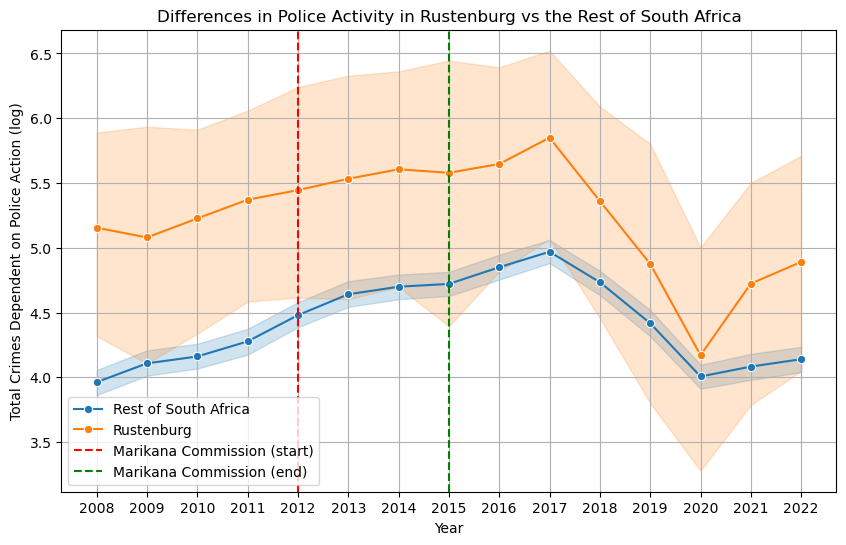

In [10]:
plt.figure(figsize=(10,6))

# Lineplot for treated vs control
chart_1 = sns.lineplot(
    data=crime_data,
    x='year_numeric',
    y='crimes_dependent_on_police_action_for_detention_log',
    hue='group_label',
    marker='o'
)

# Add vertical line for treatment start year (2012)
plt.axvline(x=2012, color='red', linestyle='--', label='Marikana Commission (start)')
# Add vertical line for treatment end year (2014)
plt.axvline(x=2015, color='green', linestyle='--', label='Marikana Commission (end)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes Dependent on Police Action (log)')
plt.title('Differences in Police Activity in Rustenburg vs the Rest of South Africa')
plt.legend()
plt.xticks(crime_data['year_numeric'].unique())
plt.grid(True)
#Saving the chart as a png
plt.savefig('charts/did(police_model).png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Chart for Total Crime as the Outcome Variable (Citizen Model)

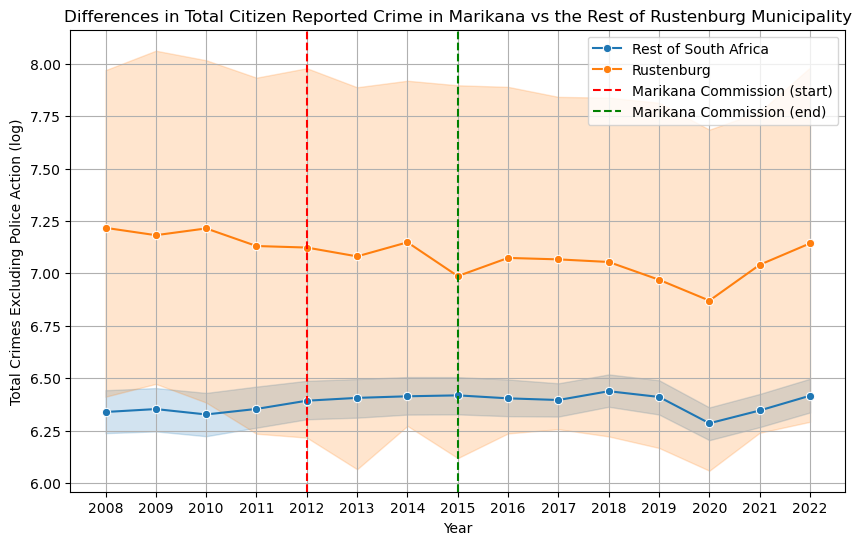

In [11]:
plt.figure(figsize=(10,6))

# Lineplot for treated vs control
chart_3 = sns.lineplot(
    data=crime_data,
    x='year_numeric',
    y='total_crime_excl_police_log',
    hue='group_label',
    marker='o'
)

# Add vertical line for treatment start year (2012)
plt.axvline(x=2012, color='red', linestyle='--', label='Marikana Commission (start)')
# Add vertical line for treatment end year (2014)
plt.axvline(x=2015, color='green', linestyle='--', label='Marikana Commission (end)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes Excluding Police Action (log)')
plt.title('Differences in Total Citizen Reported Crime in Marikana vs the Rest of Rustenburg Municipality')
plt.legend()
plt.xticks(crime_data['year_numeric'].unique())
plt.grid(True)
#Saving the chart as a png
plt.savefig('charts/did(citizen_model).png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Chart for Total Crime as the Outcome Variable (Citizen Model): Interrupted Time Series

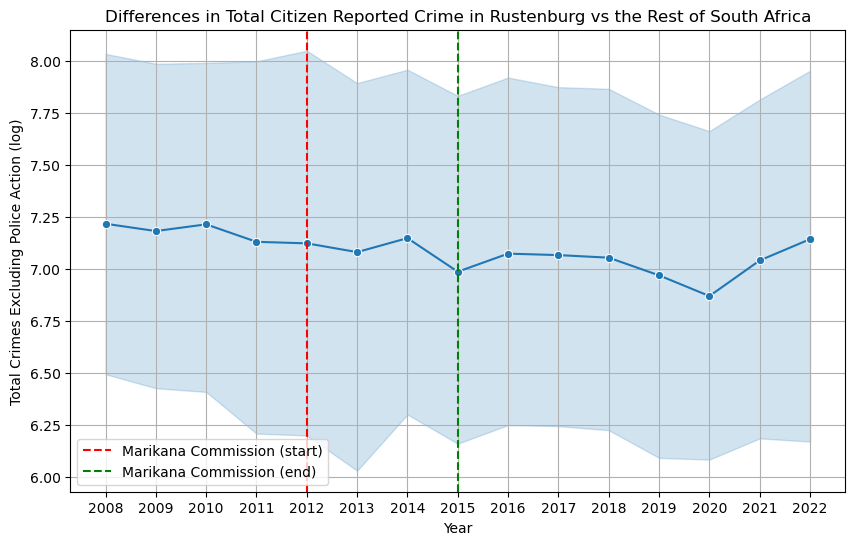

In [12]:
plt.figure(figsize=(10,6))

# Lineplot for treated vs control
chart_3 = sns.lineplot(
    data=rustenburg_municipality_df,
    x='year_numeric',
    y='total_crime_excl_police_log',
    marker='o'
)

# Add vertical line for treatment start year (2012)
plt.axvline(x=2012, color='red', linestyle='--', label='Marikana Commission (start)')
# Add vertical line for treatment end year (2014)
plt.axvline(x=2015, color='green', linestyle='--', label='Marikana Commission (end)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes Excluding Police Action (log)')
plt.title('Differences in Total Citizen Reported Crime in Rustenburg vs the Rest of South Africa')
plt.legend()
plt.xticks(rustenburg_municipality_df['year_numeric'].unique())
plt.grid(True)
#Saving the chart as a png
plt.savefig('charts/its(citizen_model).png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Chart for Total Crime as the Outcome Variable (Police Model): Interrupted Time Series

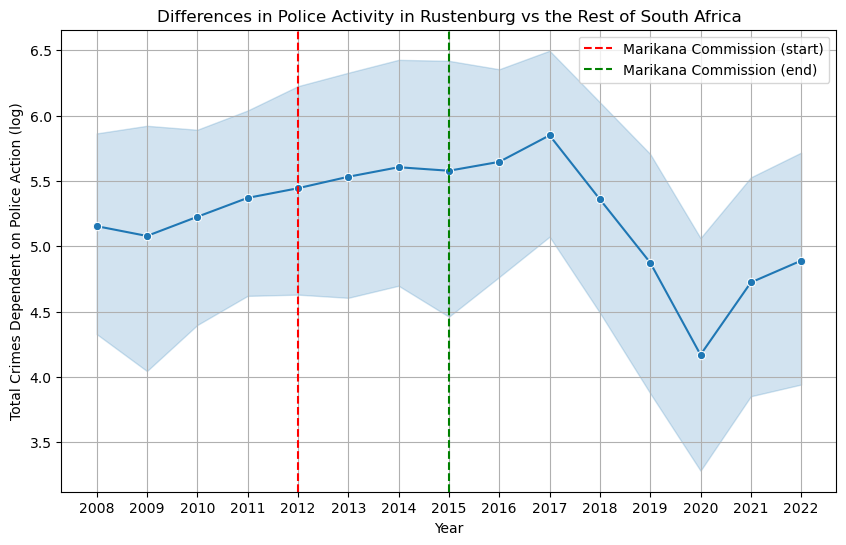

In [13]:
plt.figure(figsize=(10,6))

# Lineplot for treated vs control
chart_1 = sns.lineplot(
    data=rustenburg_municipality_df,
    x='year_numeric',
    y='crimes_dependent_on_police_action_for_detention_log',
    marker='o'
)

# Add vertical line for treatment start year (2012)
plt.axvline(x=2012, color='red', linestyle='--', label='Marikana Commission (start)')
# Add vertical line for treatment end year (2014)
plt.axvline(x=2015, color='green', linestyle='--', label='Marikana Commission (end)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes Dependent on Police Action (log)')
plt.title('Differences in Police Activity in Rustenburg vs the Rest of South Africa')
plt.legend()
plt.xticks(rustenburg_municipality_df['year_numeric'].unique())
plt.grid(True)
#Saving the chart as a png
plt.savefig('charts/its(police_model).png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()